<h2>FIN5622 Project #1
    <p class="text-primary">Bitcoin Price Prediction with Linear Regression</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will build a linear regression model to predict the price of Bitcoin based on historical hashrate and volumes.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from previous tasks informing work in later tasks. Include all code used to produce your results, and support your answers with comments if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5622_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in the dataset "BTC.csv" into a dataframe called <code>data</code> using the pandas <code>read_csv</code> function. Check that there are 500 daily observations present in the dataframe, and the shape of the dataframe should be <code>(500, 4)</code>.
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [2]:
data = pd.read_csv('./BTC.csv')
data

,Date,HashRate,LagVolume,BTC
0,9/20/2014,0.230942,21.0568,408.904
1,9/23/2014,0.251184,36.8636,435.791
2,9/26/2014,0.256320,45.0995,404.425
3,9/29/2014,0.242339,21.4608,375.467
4,10/2/2014,0.237193,32.4977,375.072
...,...,...,...,...
495,10/14/2018,50.515185,5181.6400,6290.930
496,10/17/2018,52.041214,3085.3200,6544.430
497,10/20/2018,52.252979,4088.4200,6489.190
498,10/23/2018,51.051520,3379.1300,6475.740


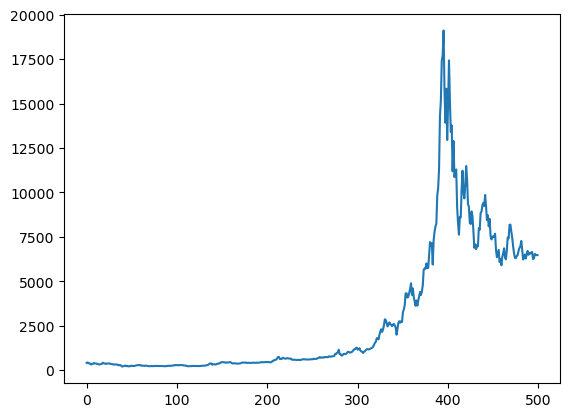

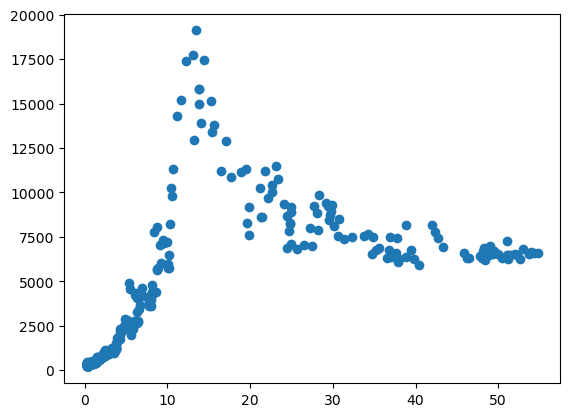

In [3]:
plt.plot(data['BTC'])
plt.show()

plt.scatter(data['HashRate'], data["BTC"])
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body">
    The column "BTC" in the dataset represents the price of one Bitcoin denominated in $USD. "HashRate" is measured in units of hash per second, and is the speed of which calculations are performed across the Bitcoin network by miners. The more Bitcoin miners there are on the network, and the more powerful Bitcoin mining hardware is used, the higher the hashrate will be.
    <br><br>
    Create a variable called <code>model_1</code> and assign it equal to a linear regression model object using <code>LinearRegression</code> from the <code>sklearn.linear_model</code> library. Fit the linear regression model using the <code>.fit()</code> method, <b>using the only the hashrate as an explanatory variable</b> (note, do not use the column "LagVolume" yet), and the column "BTC" as the target variable. 
    <br><br>
    Print out and <b>interpret the model's beta coefficient and intercept</b>. Note that the model's beta coefficient and intercept are stored in the <code>.coef_</code> and <code>.intercept_</code> attributes, respectively. 
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [4]:
model_1 = LinearRegression().fit(data[['HashRate']], data['BTC'])
model_1.coef_, model_1.intercept_

(array([181.89071814]), 1231.5974670429564)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Calculate and store <code>model_1</code>'s (the linear regression model from Task 2) predictions for the price of BTC for each day in <code>data</code> based on the hash rate. Recall that this can be done through the model's <code>.predict()</code> method. Store these predictions in a variable called <code>pred_1</code>
    <br><br>
    Plot a line plot of the historical BTC price against the predicted BTC price from <code>model_1</code>. Include an appropriate y-axis label and legend. Your plot should look like the one below:
    
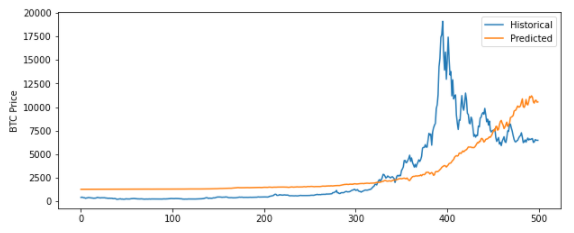
    <br>
    Through visual inspection, how well does the model predict the price of BTC?
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

[]

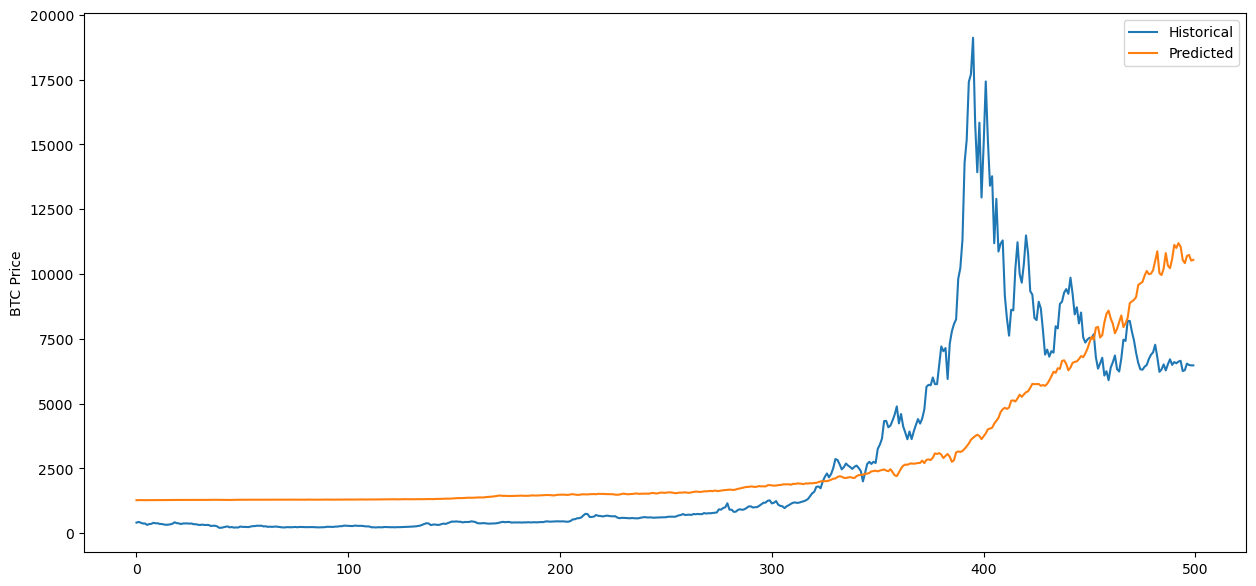

In [5]:
pred_1 = model_1.predict(data[['HashRate']])

plt.figure(figsize = (15, 7))
plt.ylabel('BTC Price')
plt.plot(data['BTC'], label = 'Historical')
plt.plot(pred_1, label = 'Predicted')
plt.legend()
plt.plot()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Define a function called <code>calculate_RMSE()</code> that takes in as input an array of historical values and another arrary of predicted values, then calculates and returns the root mean squared error between the two series.
    <br><br>
    Use this function to calculate the root mean squared error between the actual BTC price and predicted price from <code>model_1</code>.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [6]:
def calculate_RMSE(x, y):
    return np.sqrt(np.mean((x - y)**2))

In [7]:
calculate_RMSE(pred_1, data['BTC'])

2765.698793944989

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Both the price of BTC and the hash rate tend to increase exponentially over time, rather than linearly. Therefore, a linear regression on the <b>log transformation</b> of these variables are more appropriate.
    <br>
    <ul>
        <li>Build a second model, <code>model_2</code>, fitted using the log of hash rate as the explanatory variable, and the log of BTC price as the target.</li>
        <li>Print out and interpret the beta coefficient and intercept for <code>model_2</code>.</li>
        <li>Predict using <code>model_2</code> the log-BTC price using the log-hash rate for each day in the dataset. Store these predictions in a variable called <code>yhat_2</code></li>
        <li>Transform the log-BTC predictions back into BTC predictions by taking the exponential. Store these predictions in a variable called <code>pred_2</code></li>
    </ul>
    <br>
    Recall that that we can take the log by using the numpy function <code>np.log()</code> and exponentials using the numpy function <code>np.exp()</code>.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [8]:
model_2 = LinearRegression().fit(np.log(data[['HashRate']]), np.log(data['BTC']))
model_2.coef_, model_2.intercept_

(array([0.77547564]), 6.352009692077947)

In [9]:
yhat_2 = model_2.predict(np.log(data[['HashRate']]))
pred_2 = np.exp(yhat_2)

In [10]:
yhat_2

array([5.21547993, 5.2806354 , 5.29633309, 5.25283708, 5.23619158,
       5.25969731, 5.26956638, 5.31449066, 5.31518995, 5.29110312,
       5.30293523, 5.29318071, 5.2999469 , 5.31320494, 5.33429167,
       5.35797966, 5.39151897, 5.41354094, 5.39411484, 5.38212831,
       5.37983963, 5.38668547, 5.36984185, 5.38135168, 5.36614412,
       5.39640665, 5.38103497, 5.38319307, 5.35723079, 5.38157012,
       5.3899951 , 5.35021024, 5.3400124 , 5.35841902, 5.41061602,
       5.44355897, 5.46528522, 5.47674565, 5.46084297, 5.42470057,
       5.41082948, 5.43444467, 5.449427  , 5.42740391, 5.37201877,
       5.41035917, 5.46127105, 5.45783277, 5.47913839, 5.48229722,
       5.46526183, 5.48008067, 5.51255063, 5.52687191, 5.51154541,
       5.50493993, 5.53146698, 5.50968464, 5.50670906, 5.53092239,
       5.50964734, 5.48287699, 5.49952044, 5.52155136, 5.56216519,
       5.56819397, 5.53644913, 5.53040159, 5.52874728, 5.52475747,
       5.52158578, 5.5144017 , 5.53106217, 5.5347142 , 5.53806

In [11]:
pred_2

array([  184.10015457,   196.49468791,   199.60353792,   191.10768745,
         187.95293449,   192.42323822,   194.33167824,   203.26095803,
         203.40314552,   198.56234297,   200.92570815,   198.9753026 ,
         200.32617179,   202.99978947,   207.32584147,   212.29560458,
         219.53660258,   224.4248584 ,   220.10723133,   217.48465863,
         216.98747364,   218.47803141,   214.82889025,   217.31581861,
         214.0359768 ,   220.61225353,   217.24700271,   217.71635053,
         212.13668062,   217.36329489,   219.20231204,   210.65258025,
         208.51529492,   212.38889734,   223.76939119,   231.26378222,
         236.3432547 ,   239.06743123,   235.29568879,   226.94338218,
         223.81716215,   229.16554939,   232.62483373,   227.55771679,
         215.29706542,   223.71192424,   235.39643514,   234.58846593,
         239.64014185,   240.39832019,   236.3377284 ,   239.86605633,
         247.78232385,   251.35641529,   247.53337186,   245.90368444,
      

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Calculate the RMSE of the predicted BTC price from <code>model_2</code> by using the function <code>calculate_RMSE()</code> created in Task 4.
    <br><br>
    Then, plot the following two line plots:
    <ul>
        <li>The historical log of BTC price against the predicted log of BTC price from <code>model_2</code>.</li>
        <li>The historical BTC price against the predicted BTC price from <code>model_2</code>.</li>
    </ul>
    <br>
    Your final plots should look similar to the following:

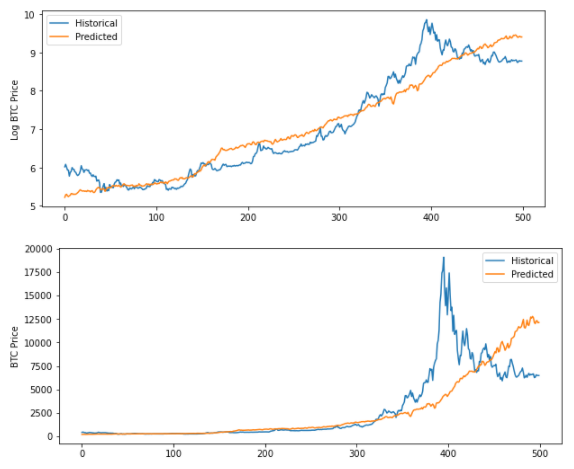
    <br>
    Did applying a log transformation on BTC price and hash rate improve the linear regression model performance? Assess this through comparing both of the following:
    <ul>
        <li>The RMSE between <code>model_2</code> and <code>model_1</code></li>
        <li>A visual comparison of the line plots of BTC price vs. predicted BTC price of the two models. (Hint: Which periods did <code>model_2</code> improve performance, and which periods does it still fall short?)</li>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [12]:
calculate_RMSE(pred_2, data['BTC'])

2669.9673521059312

[]

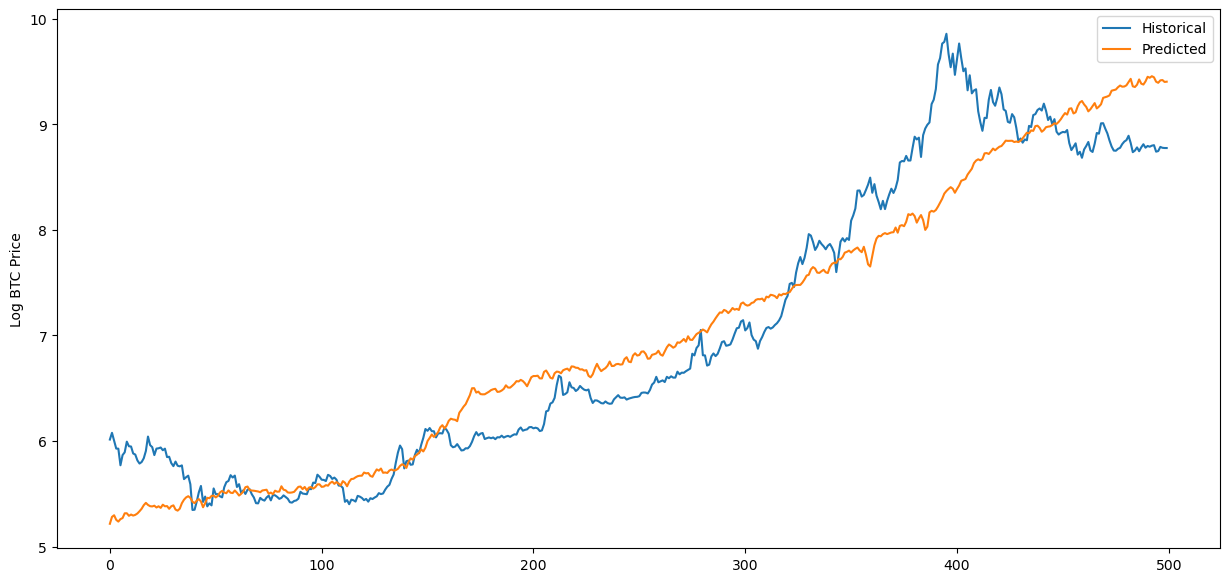

In [13]:
plt.figure(figsize = (15, 7))
plt.ylabel('Log BTC Price')
plt.plot(np.log(data['BTC']), label = 'Historical')
plt.plot((np.log(pred_2)), label = 'Predicted')
plt.legend()
plt.plot()

[]

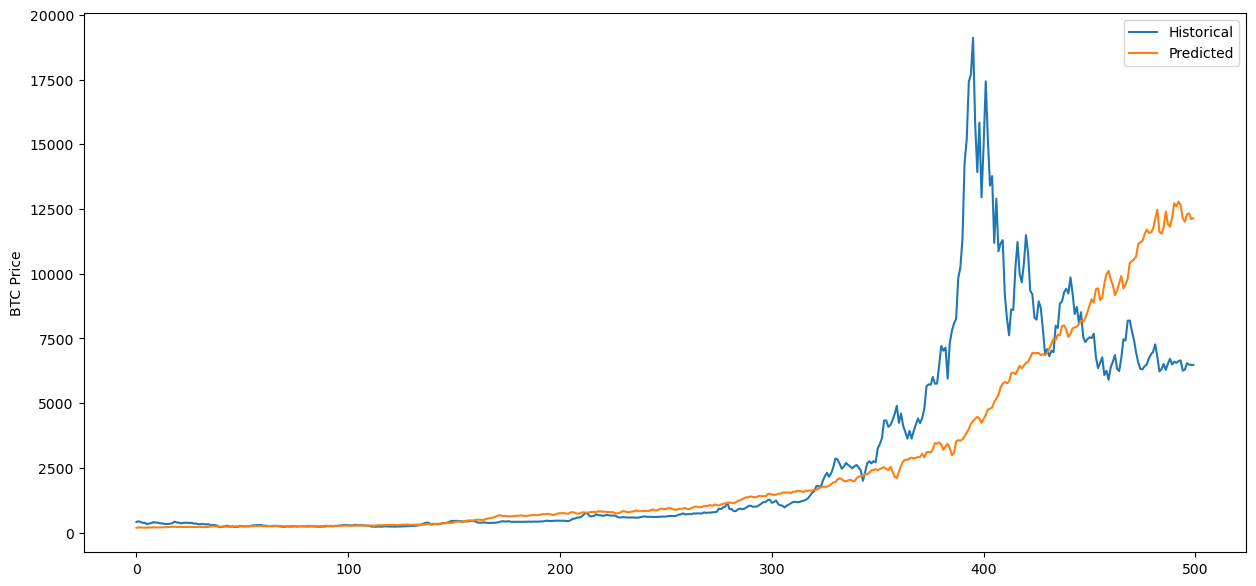

In [14]:
plt.figure(figsize = (15, 7))
plt.ylabel('BTC Price')
plt.plot(data['BTC'], label = 'Historical')
plt.plot(pred_2, label = 'Predicted')
plt.legend()
plt.plot()

The RMSE of model 2 is marginally lower (almost 2669 for model 2) than the RMSE of model 1(almost 2765 for model 1). It makes RMSE of model 2 a little bit more effective model to predict the price of BTC. According to the graph below when we compare it with model 1 we can say that model 2 does a much better job predicting the BTC price until about the 350 mark on the x axis, where it underpredicts the price until the 450 mark when they meet once again. However, from this point on this model overpredicts the price of BTC. Model 1, meanwhile shows a similar graph but displays its worse predicting ability as it overpredicts BTC price from the onset and only briefly meets historical values on two occasions in the 300-400 range on the X-axis.

[]

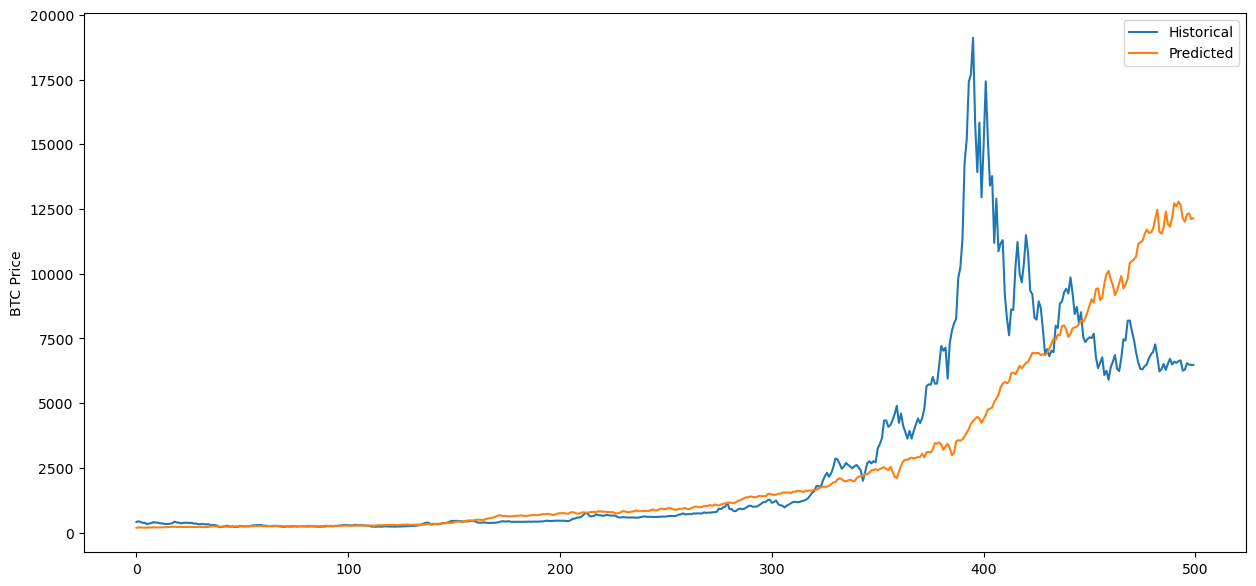

In [15]:
plt.figure(figsize = (15, 7))
plt.ylabel('BTC Price')
plt.plot(data['BTC'], label = 'Historical')
plt.plot(pred_2, label = 'Predicted')
plt.legend()
plt.plot()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Thus far, we have not made use of the data stored in the column "LagVolume", which represents the volume of BTC transtions in millions, lagged by one day. We will now attempt a third model, <code>model_3</code>, where we will use both the log hash rate and log volume as explanatory variables, and the log of BTC price as the target. 
    <br>
    <ul>
        <li>After fitting the model, print out and interpret the beta coefficients and intercept for <code>model_3</code>.</li>
        <li>Predict using <code>model_3</code> the log-BTC price using the log-hash rate for each day in the dataset. Store these predictions in a variable called <code>yhat_3</code></li>
        <li>Transform the log-BTC predictions back into BTC predictions by taking the exponential. Store these predictions in a variable called <code>pred_3</code></li>
        <li>Calculate the RMSE of the predicted BTC price from <code>model_3</code> by using the function <code>calculate_RMSE()</code> created in Task 4.</li>
    </ul>
    <br>
    Then, create the following two line plots:
    <ul>
        <li>The historical log of BTC price against the predicted log of BTC price from <code>model_3</code>.</li>
        <li>The historical BTC price against the predicted BTC price from <code>model_3</code>.</li>
    </ul>
    <br>
    Your final plots should look similar to the following:

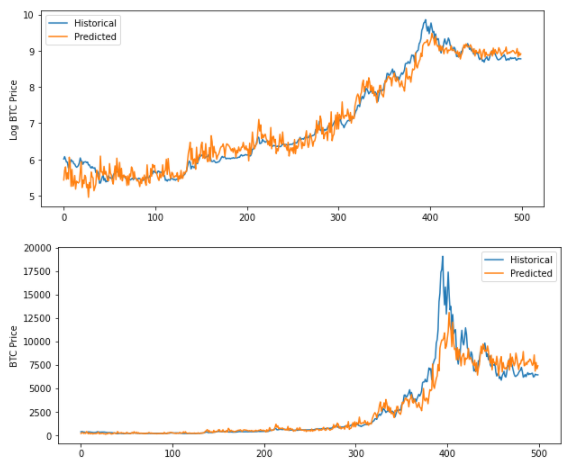
    <br>
    Did including log volume as an additional feature improve the linear regression model performance? Assess this through comparing both of the following:
    <ul>
        <li>The RMSE between <code>model_3</code> and <code>model_2</code></li>
        <li>A visual comparison of the line plots of BTC price vs. predicted BTC price of the two models. (Hint: Which periods did <code>model_3</code> improve performance, and which periods does it still fall short?)</li>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [16]:
model_3 = LinearRegression().fit(np.log(data[['HashRate', 'LagVolume']]), np.log(data['BTC']))
model_3.coef_, model_3.intercept_

(array([0.2169235 , 0.44653415]), 4.389846168080155)

In [17]:
yhat_3 = model_3.predict(np.log(data[['HashRate', 'LagVolume']]))
yhat_3

array([5.43261451, 5.70090002, 5.7953332 , 5.45155055, 5.63217977,
       5.46001508, 6.06187241, 5.8868864 , 5.25685696, 5.72312415,
       5.26189725, 5.34325901, 5.55818324, 5.18093091, 5.40056498,
       5.36835261, 5.34950456, 5.38807878, 5.64729512, 5.93888488,
       5.22397046, 5.43300324, 5.33239548, 5.56349161, 5.51313572,
       5.22322407, 5.31324509, 4.95408907, 5.36141226, 5.21575516,
       5.65218447, 5.52541923, 5.49336678, 5.13486597, 5.22390692,
       5.31232987, 5.70384859, 5.54985898, 5.44869013, 5.44242083,
       6.09308571, 5.65319171, 5.65499413, 5.56464268, 5.80951458,
       5.59156481, 5.66845005, 5.53033466, 5.41460245, 5.41696034,
       5.88625302, 5.62361054, 5.57183418, 5.40811233, 5.32086522,
       5.5940344 , 5.82270473, 5.44053259, 6.0360372 , 5.6995868 ,
       5.52453713, 5.91733125, 5.45276736, 5.75605196, 5.40809881,
       5.56428113, 5.5646521 , 5.49847773, 5.53251615, 5.28224073,
       5.54907167, 5.29877967, 5.59714768, 5.53014809, 5.79316

In [18]:
pred_3 = np.exp(yhat_3)
pred_3

array([  228.74652331,   299.13650805,   328.76170756,   233.11934899,
         279.27020016,   235.10096945,   429.17828157,   360.28176284,
         191.87746416,   305.85898164,   192.84702272,   209.19336352,
         259.35122831,   177.84829508,   221.53154089,   214.50919588,
         210.50397941,   218.78265089,   283.52353196,   379.51149078,
         185.66991725,   228.83546191,   206.93308436,   260.73162087,
         247.92734031,   185.53138696,   203.00793911,   141.75341943,
         213.02558076,   184.15083118,   284.91317062,   250.99153974,
         243.07420814,   169.84155383,   185.658121  ,   202.82222746,
         300.01983657,   257.20128356,   232.45348171,   231.00072065,
         442.78561427,   285.20029005,   285.71480587,   261.03191401,
         333.45722019,   268.15490245,   289.58534347,   252.22830815,
         224.66321349,   225.19356979,   360.05363917,   276.8872936 ,
         262.91589362,   223.20984358,   204.56079598,   268.81795294,
      

In [19]:
calculate_RMSE(pred_3, data['BTC'])

1222.9887361255976

[]

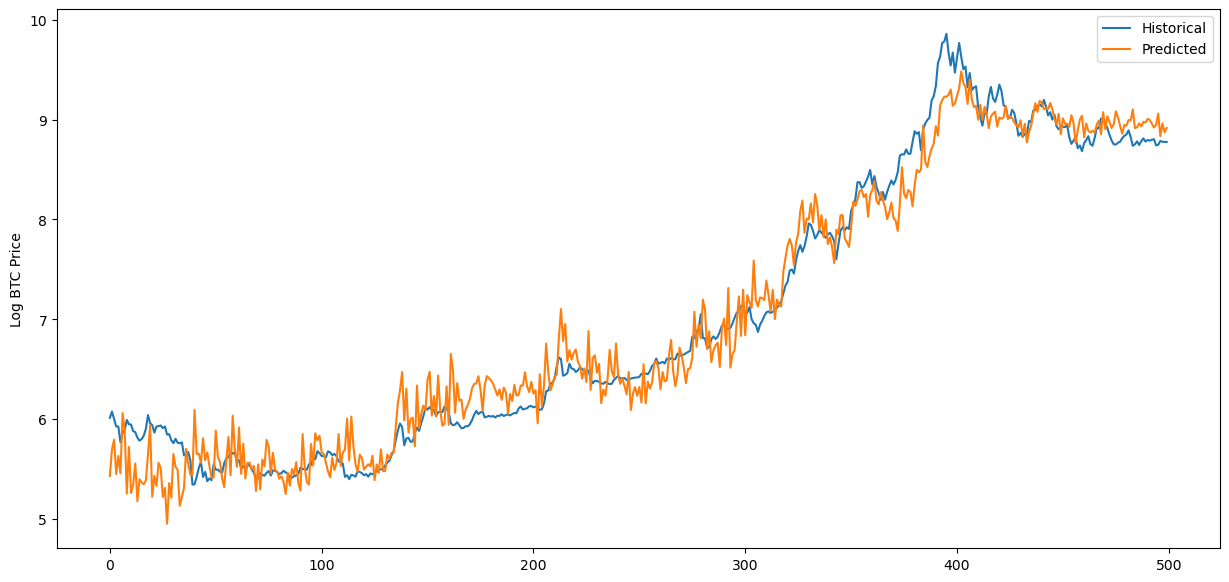

In [20]:
plt.figure(figsize = (15, 7))
plt.ylabel('Log BTC Price')
plt.plot(np.log(data['BTC']), label = 'Historical')
plt.plot((np.log(pred_3)), label = 'Predicted')
plt.legend()
plt.plot()

[]

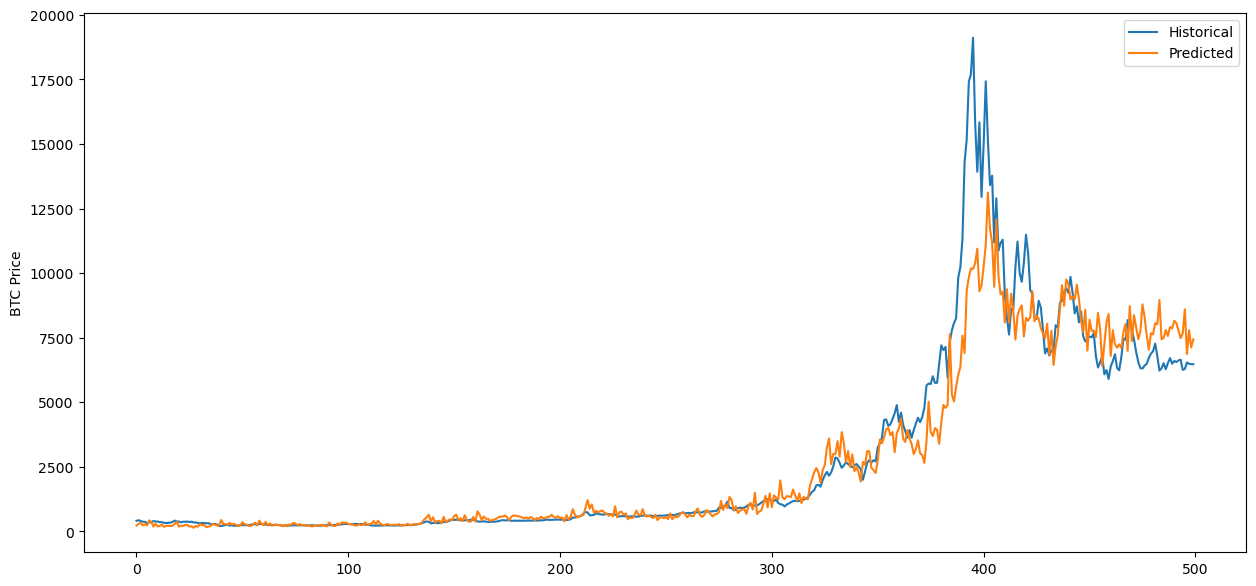

In [21]:
plt.figure(figsize = (15, 7))
plt.ylabel('BTC Price')
plt.plot(data['BTC'], label = 'Historical')
plt.plot(pred_3, label = 'Predicted')
plt.legend()
plt.plot()

The RMSE for Model 3 is a significant improvement of model 2, with 1222 for model 3 being less than half of the RMSE of 2669 in model 2. This means that this model is pretty good at predicting BTC price.So when we compare these models visually model 3 does a better job of being in line with the historical price than model 2, and is outperforming the old model in every metric, with model 2 occasionaly being able to predict at the same effectiveness of model 3 at the begininning of the graph.

[]

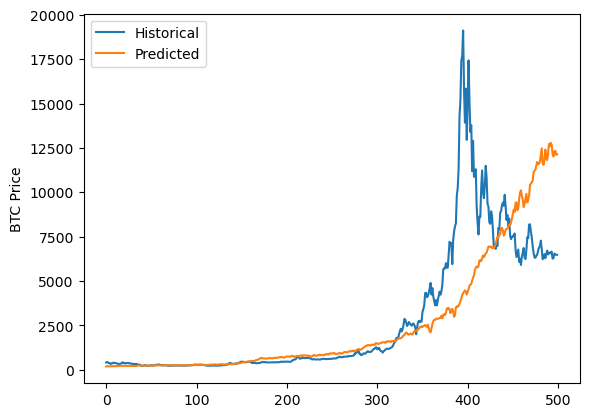

In [22]:
plt.ylabel('BTC Price')
plt.plot(data['BTC'], label = 'Historical')
plt.plot(pred_2, label = 'Predicted')
plt.legend()
plt.plot()

[]

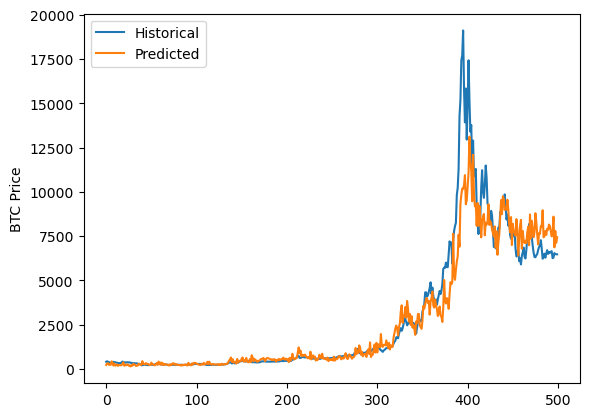

In [23]:
plt.ylabel('BTC Price')
plt.plot(data['BTC'], label = 'Historical')
plt.plot(pred_3, label = 'Predicted')
plt.legend()
plt.plot()